<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/deep_learning/deep_learning/red_agrupamiento/SOM_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mapas auto organizados

## Carga de repositorio

In [ ]:
!git clone https://github.com/cccg8105/deeplearning-az.git

from google.colab import drive
drive.mount('/content/drive')

fatal: destination path 'deeplearning-az' already exists and is not an empty directory.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Instalación de dependencias

In [ ]:
!pip install sklearn
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git
!pip install keras
!pip install tensorflow

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-0owr6cj6
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-0owr6cj6
  Created wheel for Theano: filename=Theano-1.0.5+1.geb6a4125c-cp36-none-any.whl size=2668281 sha256=51d3f10647ed11ddb3e869dd5b3332f384ebd96b5e5bb668e2e457b8b43c609e
  Stored in directory: /tmp/pip-ephem-wheel-cache-_z_jq3fk/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.5+1.geb6a4125c
    Uninstalling Theano-1.0.5+1.geb6a4125c:
      Successfully uninstalled Theano-1.0.5+1.geb6a4125c


## Importar el data set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/cccg8105/deeplearning-az/master/datasets/Part%204%20-%20Self%20Organizing%20Maps%20(SOM)/Credit_Card_Applications.csv')
# Caracteristicas
X = dataset.iloc[:, :-1].values
# 
y = dataset.iloc[:, -1].values

dataset.head(5)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### Escalado de variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler
rangoEscala = (0, 1)
sc = MinMaxScaler(feature_range = rangoEscala)
X = sc.fit_transform(X)

## Creación de modelo y entrenamiento

In [ ]:
import sys
sys.path.append('/content/deeplearning-az/datasets/Part 4 - Self Organizing Maps (SOM)')
from minisom import MiniSom
tamanioMapaX = 10
tamanioMapaY = 10
cantidadColumnsX = 15
ratioAprendizaje = 0.5
som = MiniSom(x = tamanioMapaX, y = tamanioMapaY, input_len = cantidadColumnsX, sigma = 1.0, learning_rate = ratioAprendizaje)
som.random_weights_init(X) # Inicializacion aleatoria

numeroIteraciones = 100
som.train_random(data = X, num_iteration = numeroIteraciones)

## Visualizar los resultados

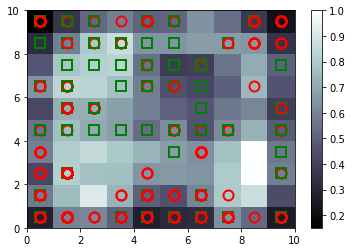

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show
# Se crea la ventana del mapa auto-organizado
bone()
# rango de colores
pcolor(som.distance_map().T)
# genera una barra indicador del indice de distancias medias
# A mayor distancia media las cuadriculas se veran mas claras (atipicos)
colorbar()

# crear marcadores circulos y cuadrados
markers = ['o', 's']
# se definen colores de cada marcador
colors = ['r', 'g']
tamanioMarcador = 10
anchoMarcador = 2
# Se recorren los clientes para marcarlos en el mapa
for i, x in enumerate(X):
    # se optiene ubicacion del cliente en el mapa
    w = som.winner(x)
    # se dibuja el marcador del cliente 
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', 
         markersize = tamanioMarcador, markeredgewidth = anchoMarcador)
show()


## Detección de fraudes

In [ ]:
mappings = som.win_map(X)
# union de los posibles nodos que pueden ser fraude
frauds = np.concatenate( (mappings[(7,1)], mappings[(7,9)]), axis = 0 )
frauds = sc.inverse_transform(frauds)

print(frauds)

[[1.5788224e+07 1.0000000e+00 2.0000000e+01 1.1045000e+01 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.3600000e+02 1.0000000e+00]
 [1.5763194e+07 1.0000000e+00 2.2670000e+01 1.6500000e-01 2.0000000e+00
  8.0000000e+00 3.0000000e+00 2.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5740411e+07 1.0000000e+00 4.0580000e+01 3.2900000e+00 2.0000000e+00
  7.0000000e+00 4.0000000e+00 3.5000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 4.0000000e+02 1.0000000e+00]
 [1.5796413e+07 1.0000000e+00 2.3580000e+01 1.7900000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 5.4000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.3600000e+02 2.0000000e+00]
 [1.5776921e+07 1.0000000e+00 2.6330000e+01 1.3000000e+01 2.0000000e+00
  1.0000000e+01 2.0000000e+00 0.0000000e+00 0.0000000e+00 0.